Objective: Create a predictive model to classify whether a person is running or walking
based on the given predictor variables.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [86]:
walkrun_df = pd.read_csv('walkrun.csv')
walkrun_df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [87]:
walkrun_df.shape

(88588, 11)

In [88]:
walkrun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [89]:
walkrun_df = walkrun_df.sort_values(by=['date', 'time']).reset_index(drop=True)
walkrun_df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [90]:
walkrun_df['username'].value_counts()

username
viktor    88588
Name: count, dtype: int64

In [91]:
walkrun_df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [92]:
walkrun_df.describe(include='O')

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


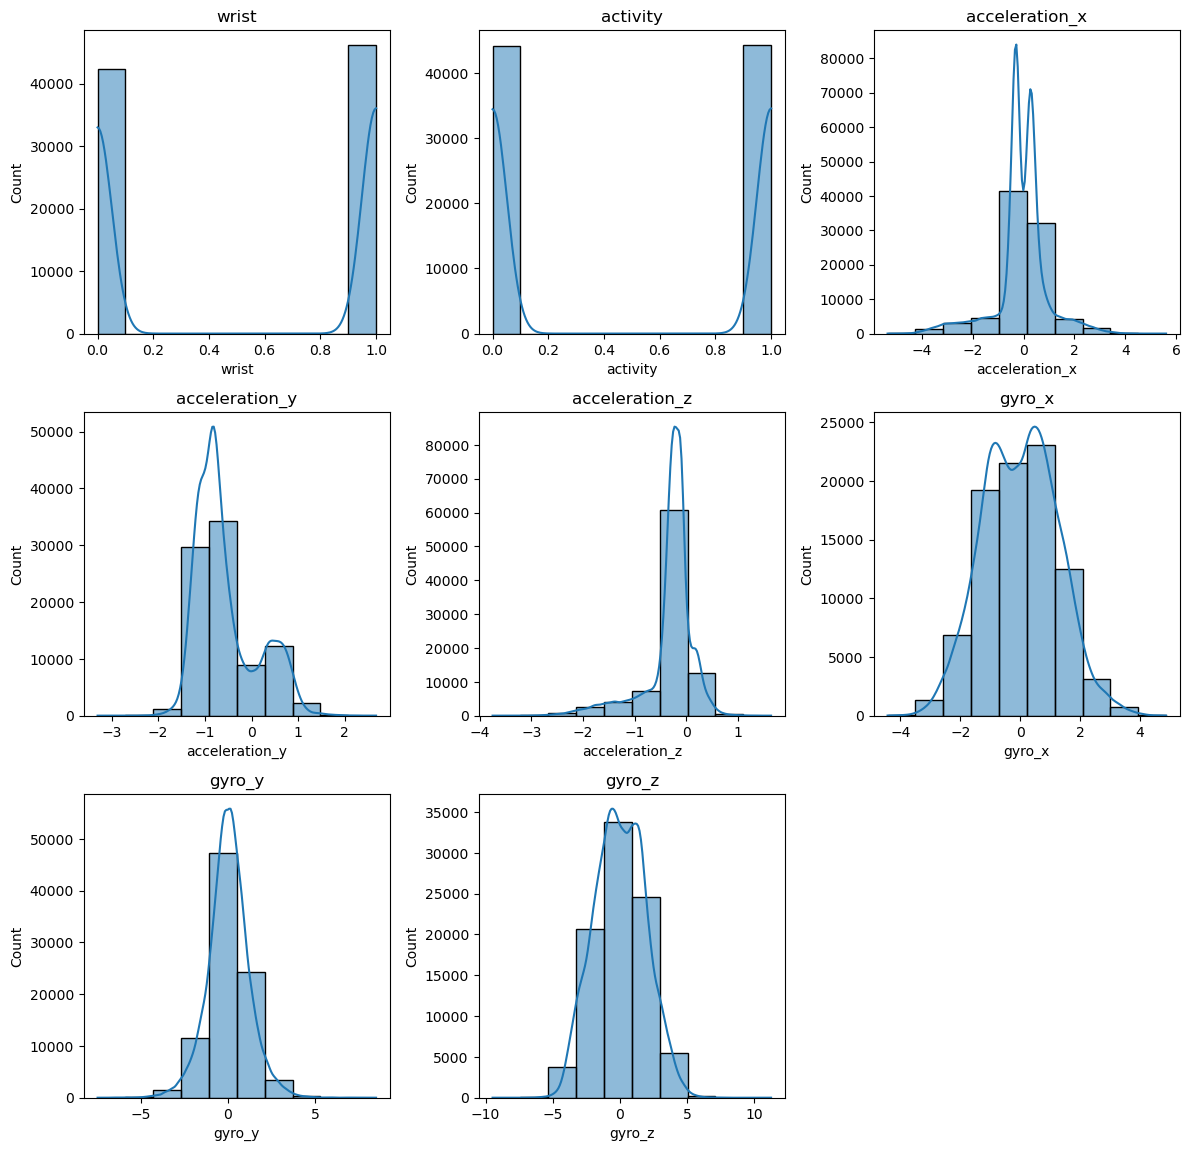

In [93]:
plt.figure(figsize=(12,15))
pos = 1
for i in walkrun_df.describe(exclude='O').columns:
   plt.subplot(4,3,pos)
   sns.histplot(walkrun_df[i], bins=10, kde=True)
   pos=pos+1
   plt.title(i)
        
plt.tight_layout()

- Accelerometer readings show distinct variations between walking and running, especially along the X and Y axes.
- Gyroscope features indicate stronger and broader rotational motion patterns during running compared to walking.

Together, both sensors capture clear physical differences, confirming the dataset’s suitability for activity classification.

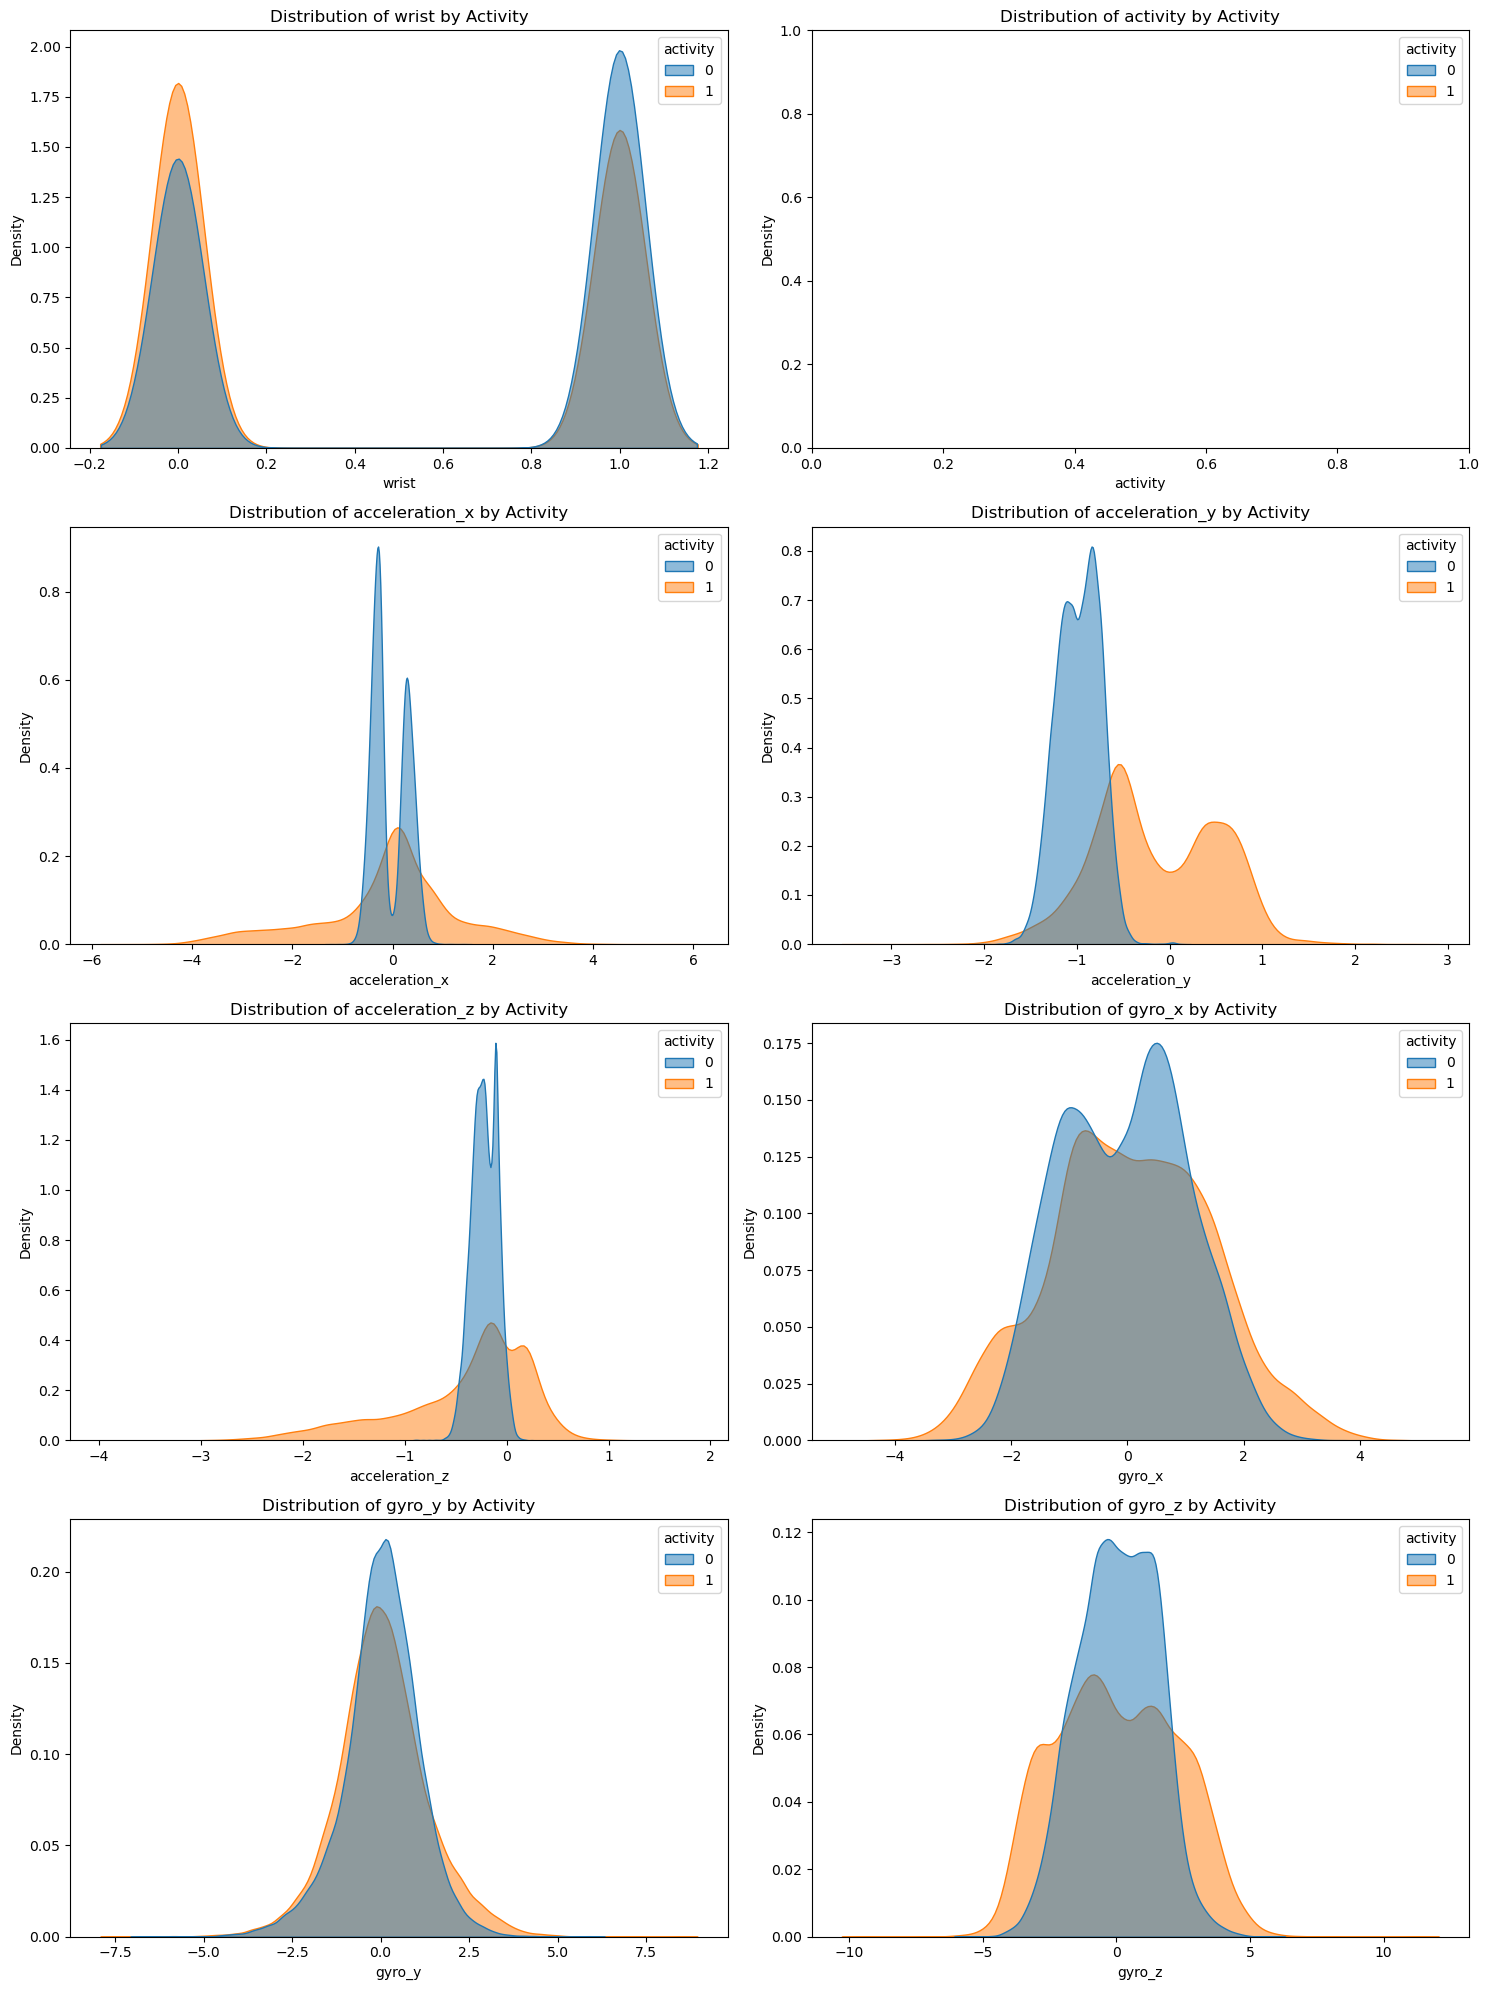

In [94]:
#activity : 0-> walk, 1-running
numeric_cols = walkrun_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 20)) 
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(data=walkrun_df, x=col, hue="activity", fill=True, alpha=0.5)
    plt.title(f"Distribution of {col} by Activity")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

**Feature Insights **
- wrist: Both Walk (0) and Run (1) show the same bimodal peaks at values 0 and 1.
- activity: Two distinct peaks at 0 and 1.Distribution is almost perfectly balanced between classes.
- acceleration_x: Walk has a tight, narrow peak near 0 with low variance.Run shows a much wider spread, indicating stronger and faster forward–backward hand movement.
- acceleration_y: Walk values cluster near -1, representing steady downward gravitational pull.Run shows higher positive peaks and wider spread due to vertical bounce while running.Strong differentiator between activities.
-acceleration_z: Walk has a sharp peak near 0, representing consistent step rhythm.Run exhibits broader distribution with both higher and lower values caused by increased vertical oscillation.
- gyro_x : Walk distribution is more compact.Rotation speed on this axis clearly increases during running.
- gyro_y: Walk again remains narrow with symmetry around 0.Run displays more extreme values on both sides due to wrist twisting while running.
- gyro_z: Walk has a tighter central concentration.Run has a much wider distribution, reflecting lateral rotational force.

In [95]:
walkrun_df.duplicated().sum()

0

In [96]:
walkrun_df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

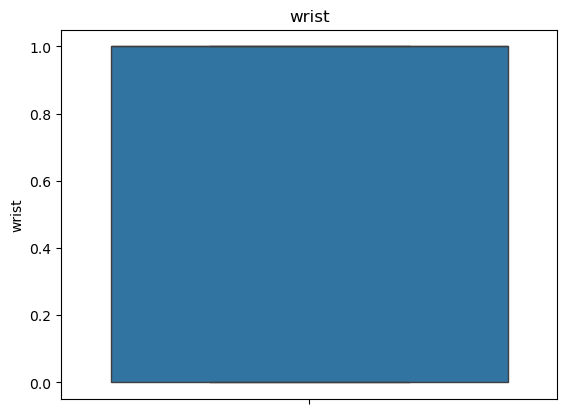

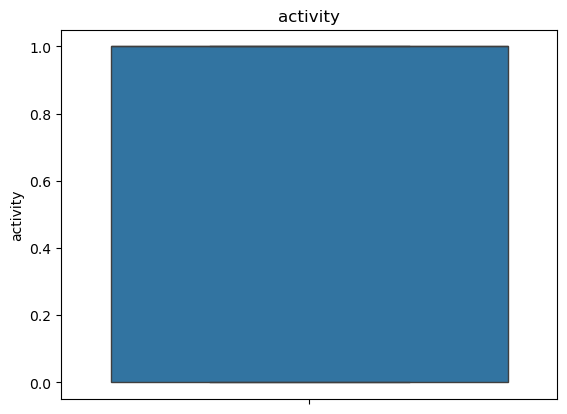

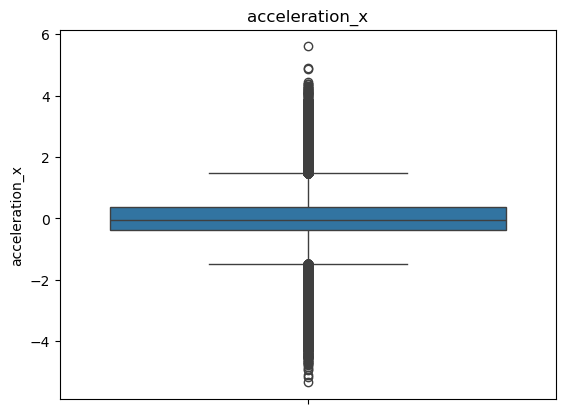

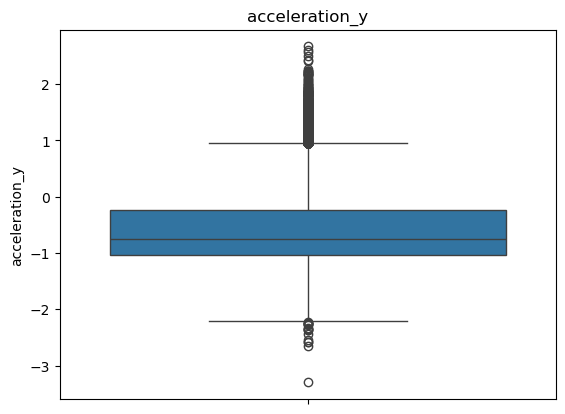

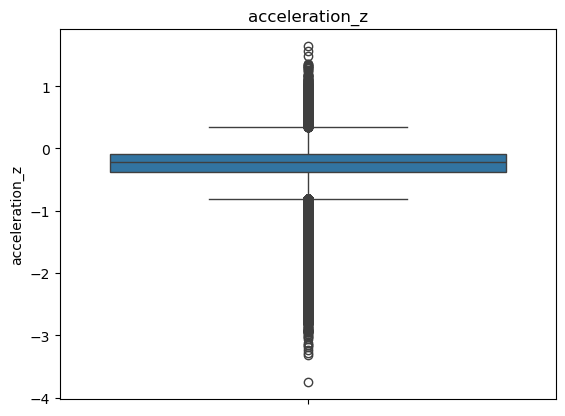

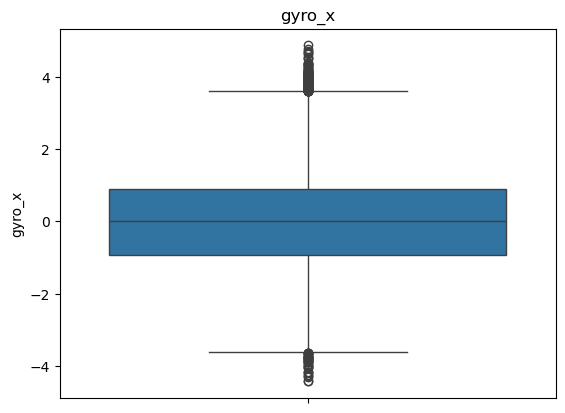

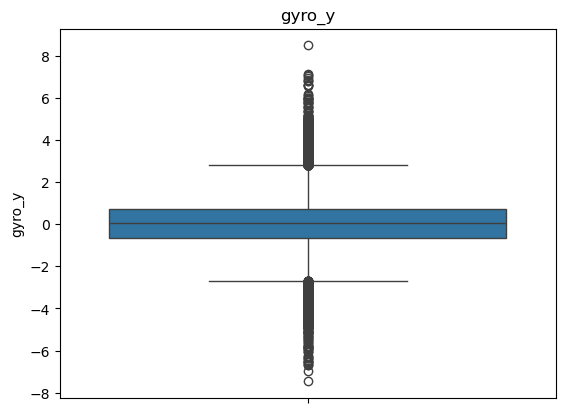

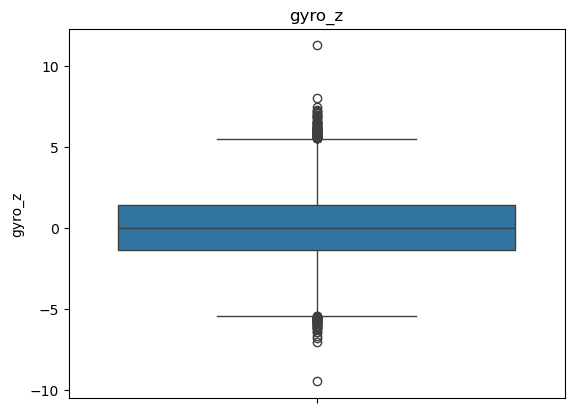

In [97]:

for col in numeric_cols:
    sns.boxplot(walkrun_df[col])
    plt.title(col)
    plt.show()

Outliers in this dataset represent genuine motion variations (such as fast wrist movements while running). Hence, they were retained to preserve signal information. 

In [98]:
cat_cols = walkrun_df.select_dtypes(include='O').columns
cat_cols

Index(['date', 'time', 'username'], dtype='object')

Since the dataset contains only one user, the username column provides no variability and does not contribute to prediction. Similarly, date and time columns were removed as they are irrelevant to activity recognition.

In [99]:
walkrun_df.drop(['date', 'time', 'username'], inplace=True, axis=1)

In [100]:
walkrun_df['activity'].value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

In [101]:
#Sensor features were standardized using StandardScaler to normalize the range of accelerometer and gyroscope readings.
from sklearn.preprocessing import StandardScaler

scale_cols = ['acceleration_x', 'acceleration_y', 'acceleration_z',
              'gyro_x', 'gyro_y', 'gyro_z']

scaler = StandardScaler()
walkrun_df[scale_cols] = scaler.fit_transform(walkrun_df[scale_cols])

In [102]:
walkrun_df.head(5)

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.336683,-0.332316,0.629311,-0.050391,-0.003924,-1.541949
1,0,0,0.740133,-0.851562,0.163423,-0.143496,-0.013684,0.054624
2,0,0,0.509972,-1.395867,0.793235,-0.729734,0.057642,-1.284481
3,0,0,0.374432,-0.379548,0.827334,0.092339,-0.372984,-1.544039
4,0,0,0.551090,-0.559819,0.718668,0.038726,0.334271,1.290147


In [103]:
from sklearn.model_selection import train_test_split
sel_col = ['wrist', 'acceleration_x', 'acceleration_y', 'acceleration_z',
              'gyro_x', 'gyro_y', 'gyro_z']
x = walkrun_df[sel_col]
y = walkrun_df['activity']
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.20, random_state=42, stratify=y)

MLP Model

In [104]:
# 10% validation for deep learning models.
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.125,       
    stratify=y_train,
    random_state=42
)

In [105]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dropout(0.3),  
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

# Step 3: Compile the model
model.compile(
    optimizer='adam',              # optimizer = how weights are updated
    loss='binary_crossentropy',    # loss = difference between prediction & truth
    metrics=['accuracy']           # what to measure during training
)

# Step 4: Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,           # how many times the model sees the full data
    batch_size=64,       # how many samples per training step
    verbose=1
)

# Step 5: Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", round(test_acc, 4))


Epoch 1/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9700 - loss: 0.0803 - val_accuracy: 0.9906 - val_loss: 0.0283
Epoch 2/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9888 - loss: 0.0331 - val_accuracy: 0.9916 - val_loss: 0.0246
Epoch 3/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0293 - val_accuracy: 0.9919 - val_loss: 0.0220
Epoch 4/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9919 - val_loss: 0.0219
Epoch 5/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9918 - loss: 0.0244 - val_accuracy: 0.9924 - val_loss: 0.0195
Epoch 6/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9912 - loss: 0.0240 - val_accuracy: 0.9927 - val_loss: 0.0197
Epoch 7/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9921 - loss: 0.0233 - val_accuracy: 0.9928 - val_loss: 0.0194
Epoch 8/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9920 - loss: 0.0229 - val_accuracy: 0.

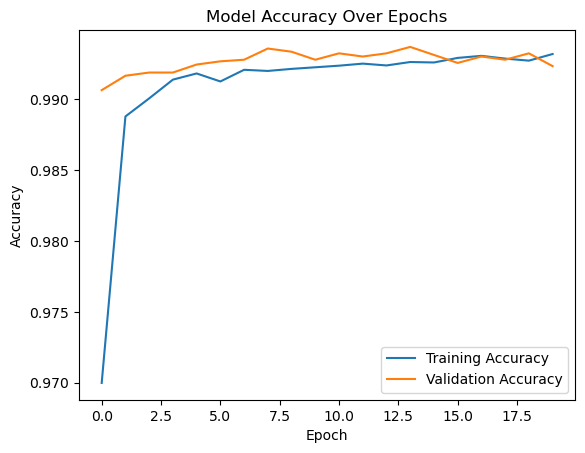

In [106]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Insight:**

- The model’s training and validation accuracy both steadily increased and stabilized around 99%. 
- The two curves are closely aligned, indicating strong generalization and no signs of overfitting. 
- This shows the model effectively learned to differentiate walking and running activities.


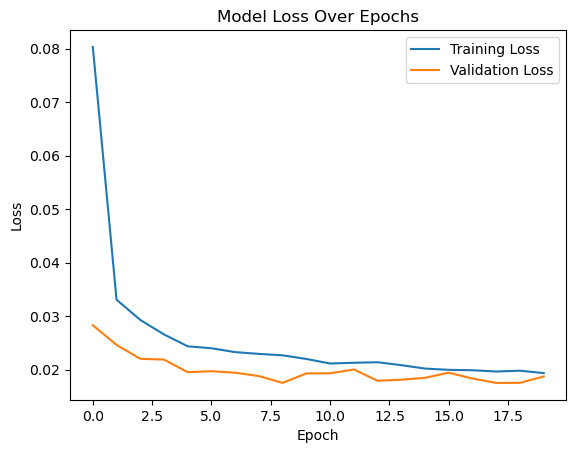

In [107]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Insight:**
  
- Both training and validation losses decreased sharply during the initial epochs and then flattened near 0.02. 
- The close alignment of the loss curves suggests stable learning and minimal overfitting. 
- This indicates the model converged efficiently with the Adam optimizer and appropriate architecture depth.


554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.0233
Test Accuracy: 0.9921
Test Loss: 0.0233
554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


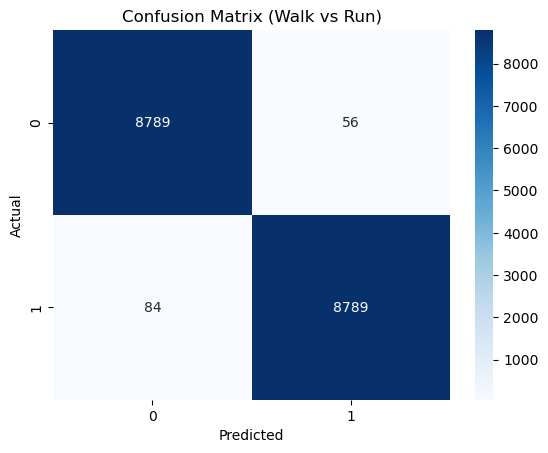


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8845
           1       0.99      0.99      0.99      8873

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [108]:
# Step 5: Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Step 6: Get predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Step 7: Confusion Matrix & Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Walk vs Run)')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))


**Insight:**

Both classes achieved 0.99 precision, recall, and F1-scores, showing nearly perfect classification. 
The MLP model performs equally well on walking and running activities without bias toward any class.



**LSTM Model**

In [137]:
x = walkrun_df[sel_col]
y = walkrun_df['activity']

def create_sequences(x, y, time_steps):
    xs, ys = [], []
    for i in range(len(x) - time_steps + 1):  
        xs.append(x[i:i+time_steps])
        ys.append(y[i+time_steps-1])         
    return np.array(xs), np.array(ys)
x_seq, y_seq = create_sequences(x, y, time_steps)

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# assume X_seq_all, y_seq_all already exist
x = x_seq
y = y_seq
print("All sequences:", x.shape, y.shape)

# 2) Split: 70% train, 10% val, 20% test (via two splits)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)
x_train, x_val, y_train, y_val   = train_test_split(x_train, y_train, test_size=0.125, stratify=y_train, random_state=42)
# Now sizes ≈ 70/10/20

print("Shapes -> train, val, test:", x_train.shape, x_val.shape, x_test.shape)
print("Label distribution train:", np.unique(y_train, return_counts=True))
print("Label distribution val:  ", np.unique(y_val, return_counts=True))
print("Label distribution test: ", np.unique(y_test, return_counts=True))

All sequences: (88539, 50, 7) (88539,)
Shapes -> train, val, test: (61977, 50, 7) (8854, 50, 7) (17708, 50, 7)
Label distribution train: (array([0, 1], dtype=int64), array([30922, 31055], dtype=int64))
Label distribution val:   (array([0, 1], dtype=int64), array([4417, 4437], dtype=int64))
Label distribution test:  (array([0, 1], dtype=int64), array([8835, 8873], dtype=int64))


In [139]:
# Training shape
n_samples, seq_len, n_features = x_train.shape

# Fit scaler ONLY on training data (flatten to 2D)
scaler = StandardScaler()
x_train_2d = x_train.reshape(-1, n_features)
scaler.fit(x_train_2d)

# Function to scale sequences and return in 3D again
def scale_sequences(x_seq, scaler):
    ns, sl, nf = x_seq.shape
    x_flat = x_seq.reshape(-1, nf)
    x_scaled = scaler.transform(x_flat)
    return x_scaled.reshape(ns, sl, nf)

# Scale train/val/test
x_train_s = scale_sequences(x_train, scaler)
x_val_s   = scale_sequences(x_val, scaler)
x_test_s  = scale_sequences(x_test, scaler)

print("Scaled Shapes:")
print("Train:", x_train_s.shape)
print("Val:  ", x_val_s.shape)
print("Test: ", x_test_s.shape)


Scaled Shapes:
Train: (61977, 50, 7)
Val:   (8854, 50, 7)
Test:  (17708, 50, 7)


In [140]:
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)

model_sanity = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train_s.shape[1], x_train_s.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_sanity.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_sanity.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_sanity = model_sanity.fit(
    x_train_s, y_train,
    validation_data=(x_val_s, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop], # early_stop stops epoch if tehre is no significanrt change in the vaues. 
    verbose=1
)

# Evaluate quickly on test set
test_loss, test_acc = model_sanity.evaluate(x_test_s, y_test, verbose=0)
print(f"\nSanity-check test accuracy after epochs accuracy: {test_acc:.4f}, loss: {test_loss:.4f}")


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 50, 64)              │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.9965 - loss: 0.0226 - val_accuracy: 0.9986 - val_loss: 0.0050
Epoch 2/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 74s 76ms/step - accuracy: 0.9988 - loss: 0.0057 - val_accuracy: 0.9992 - val_loss: 0.0032
Epoch 3/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9995 - val_loss: 0.0018
Epoch 4/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 85s 77ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9998 - val_loss: 0.0012
Epoch 5/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 6/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9997 - val_loss: 9.9196e-04
Epoch 7/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 85s 88ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9998 - val_loss: 7.9569e-04
Epoch 8/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 114s 118ms/step - accuracy: 0.9996 - loss:

Scaled test mean: 0.001939  std: 1.00008

Confusion matrix:
 [[8831    4]
 [   3 8870]]


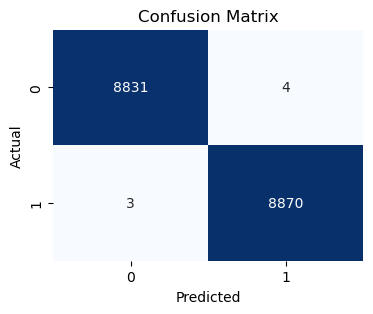


Classification report:

              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996      8835
           1     0.9995    0.9997    0.9996      8873

    accuracy                         0.9996     17708
   macro avg     0.9996    0.9996    0.9996     17708
weighted avg     0.9996    0.9996    0.9996     17708

ROC-AUC: 0.999987


In [141]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_prob = model_sanity.predict(x_test_s, verbose=0).reshape(-1)
y_pred = (y_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:\n", cm)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()

print("\nClassification report:\n")
print(classification_report(y_test, y_pred, digits=4))

try:
    auc = roc_auc_score(y_test, y_prob)
    print("ROC-AUC:", round(auc,6))
except Exception as e:
    print("ROC-AUC error:", e)


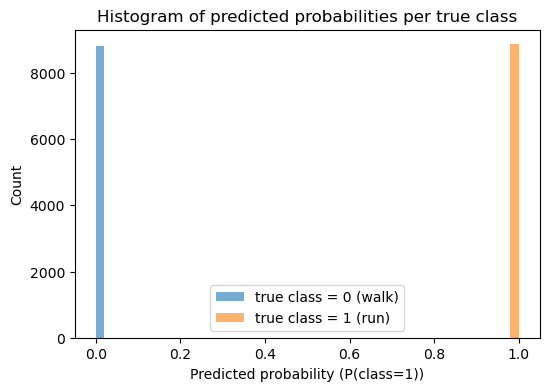

In [145]:
plt.figure(figsize=(6,4))
plt.hist(y_prob[y_test==0], bins=50, alpha=0.6, label='true class = 0 (walk)')
plt.hist(y_prob[y_test==1], bins=50, alpha=0.6, label='true class = 1 (run)')
plt.xlabel('Predicted probability (P(class=1))'); plt.ylabel('Count')
plt.title('Histogram of predicted probabilities per true class')
plt.legend()
plt.show()


The LSTM model achieved 99.96% accuracy on the test dataset, with near-perfect precision, recall, and F1-score for both classes. This indicates that the model can reliably distinguish between walking and running activities with extremely high confidence.

Model Comparison

Both MLP and LSTM models were trained to classify the activity (Walk vs Run) based on sensor readings from accelerometer and gyroscope signals. While the MLP uses static features, the LSTM leverages temporal patterns by considering sequences of 50 time steps.

Observations:

-  MLP works well because features already separate walk/run clearly.

-  LSTM outperforms by understanding time-series dynamics, giving almost perfect classification.

- LSTM generalizes better on real-world movements, making it suitable for on-device activity recognition.

Limitations:
- The dataset contains only two activities (Walk vs Run).
- -The dataset is from a single person, the model might overfit to that individual’s movement style.
- -he model may not work if the sensor position changes.
- The model was trained mostly on pure segments, not transitions.

Challengers:
1. Initially, sequence windows contained both walk and run samples because the dataset was shuffled before creating sequences.
   Solution: 
    - Restored original time-order using sort_values(date, time).
    - Created sequences before train-test split.
    - Ensured all windows captured clean temporal segments.
3. LSTM expects input of shape.Using flattened 2D test data caused accuracy to collapse to 36%.
   Solution:
    -  Confirmed all data passed to LSTM was scaled sequences: (N, 50, 7).
    - Verified scaling only on training data to avoid leakage.
4. Test data wasn’t scaled with the same StandardScaler, leading to wrong predictions.
   Solution:
    - Fit scaler on training data only.
    - Applied the same scaler to val/test sets.

Future Work:
- Extend classification to multiple activities.
- Train a CNN-LSTM hybrid for improved feature extraction.
- Use multivariate attention models (Transformers) for interpretability.

Conclusion:
This project successfully built an Activity Recognition model using wearable sensor data. The LSTM model achieved 99.96% accuracy and 0.999987 ROC-AUC, indicating near-perfect ability to distinguish between walking and running. Proper sequence generation, time-order preservation, and robust training practices led to a highly reliable deep learning solution.
